This is a notebook containing code and instructions for visualizations in Google Colab (Python) regarding my thesis.

Import the requisite libraries and mount your google drive:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import files from drive
- don't be alarmed if this takes a while. It can take up to 15 minutes to import the excel file.

In [ ]:
file = "thesisData.xlsx"
path = "/content/drive/My Drive/Colab Notebooks/Data/"
data = pd.read_excel(path+file)

subsets the dataframe by excluding records from before 1964.

In [ ]:
data = data[data['year'] >= "1964"]
data['year'] = pd.to_datetime(data['year'])
data['oecdnwto'] = np.where((data['oecdreporter'] == 1) & (data['wtoreporter'] == 1), 1, 0)
data.head(1)
r,c = data.shape
print("there are {} rows and {} columns in the dataset".format(r,c))
# print(data.columns)

there are 672166 rows and 83 columns in the dataset


In [ ]:
data['Export_Density'] = data['lnEsgExportsAdj']/data['population']
data['Import_Density'] = data['lnEsgImportsAdj']/data['population']


In [ ]:
mean_data_oecd = data[data['oecdreporter']==1]
mean_data_oecd.head()
o_r, o_c = mean_data_oecd.shape
print("there are {} rows and {} columns in the dataset".format(o_r,o_c))

there are 218413 rows and 85 columns in the dataset


In [ ]:
mean_data_wto = data[(data['wtoreporter']==1) & data['oecdreporter'] == 0]
mean_data_wto.head()
w_r, w_c = mean_data_wto.shape
print("there are {} rows and {} columns in the dataset".format(w_r,w_c))

there are 534015 rows and 85 columns in the dataset


In [ ]:
mean_data_wto = mean_data_wto.groupby(['year'])['totalesgimport','totalesgexport', 'esgExportPctTotal','esgImportPctTotal',
'lngdppc', 'lnEsgImportsAdj','lnEsgExportsAdj', 'Import_Density', 'Export_Density'].mean()

<ipython-input-7-9f0e2bace4a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_data_wto = mean_data_wto.groupby(['year'])['totalesgimport','totalesgexport', 'esgExportPctTotal','esgImportPctTotal',


In [ ]:
mean_data_oecd = mean_data_oecd.groupby(['year'])['totalesgimport','totalesgexport',
 'esgExportPctTotal','esgImportPctTotal','lngdppc', 'lnEsgImportsAdj','lnEsgExportsAdj',
 'Import_Density', 'Export_Density'].mean()
# mean_data_oecd

<ipython-input-8-672a6c46201e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_data_oecd = mean_data_oecd.groupby(['year'])['totalesgimport','totalesgexport',


In [ ]:
mean_oecdwto = data[data['oecdnwto'] == 1]
mean_oecdwto = mean_oecdwto.groupby(['year'])['totalesgimport','totalesgexport', 
'esgExportPctTotal','esgImportPctTotal','lngdppc', 'lnEsgImportsAdj','lnEsgExportsAdj','Import_Density', 'Export_Density'].mean()
# mean_oecdwto

<ipython-input-9-472493ecd154>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_oecdwto = mean_oecdwto.groupby(['year'])['totalesgimport','totalesgexport',


Plot showing the overlaid esg imports by WTO members and OECD members

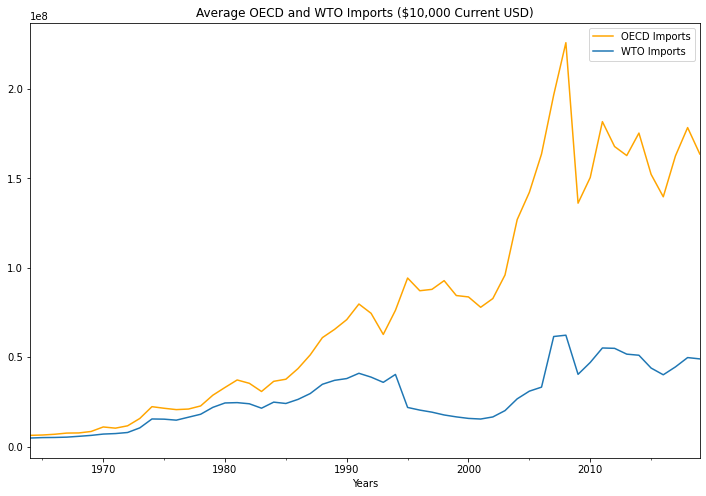

In [ ]:
plt.style.use('default')

%matplotlib inline
  
# to set the plot size
plt.figure(figsize=(12, 8))
  
# using plot method to plot imports.
# in plot method we set the label and color of the curve.
mean_data_oecd['totalesgimport'].plot(label='OECD Imports', color='orange')
mean_data_wto['totalesgimport'].plot(label = 'WTO Imports')  
# adding title to the plot
plt.title('Average OECD and WTO Imports ($10,000 Current USD)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

OECD And WTO imports over time (including the OECD X WTO Interaction term)

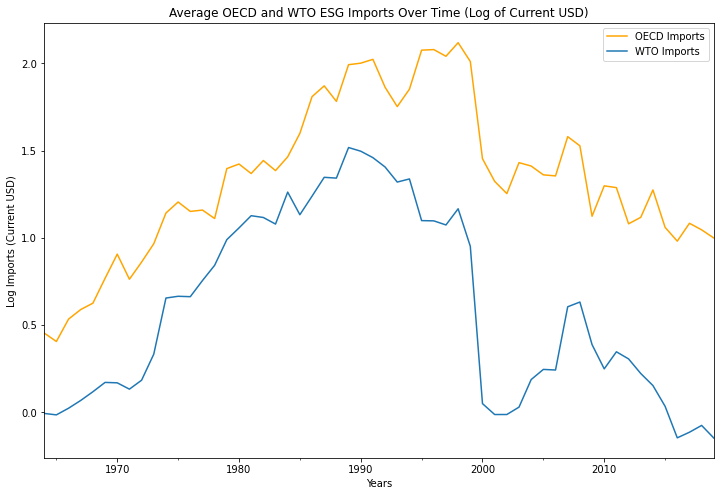

In [ ]:
# to set the plot size
plt.figure(figsize=(12, 8))
  
# using plot method to plot imports.
# in plot method we set the label and color of the curve.
mean_data_oecd['lnEsgImportsAdj'].plot(label='OECD Imports', color='orange')
mean_data_wto['lnEsgImportsAdj'].plot(label = 'WTO Imports')  
# mean_oecdwto['lnEsgImportsAdj'].plot(label = 'OECD AND WTO - members of both', color = 'red')
# adding title to the plot
plt.title('Average OECD and WTO ESG Imports Over Time (Log of Current USD)')
  
# adding Label to the x-axis
plt.xlabel('Years')
plt.ylabel('Log Imports (Current USD)')
  
# adding legend to the curve
plt.legend()

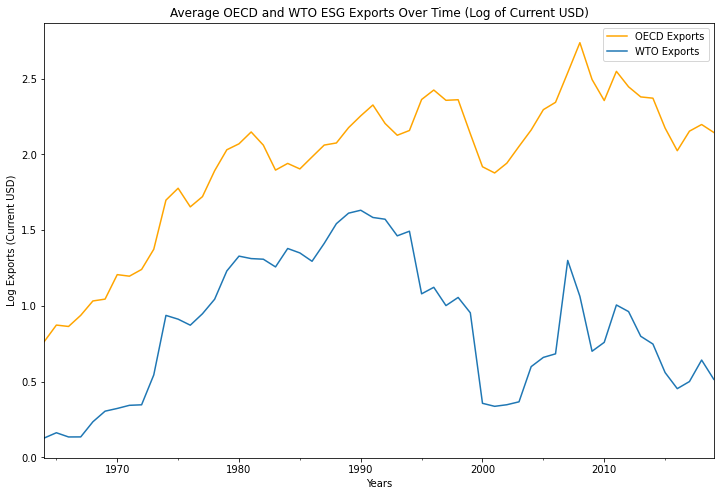

In [ ]:
# to set the plot size
plt.figure(figsize=(12, 8))
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
mean_data_oecd['lnEsgExportsAdj'].plot(label='OECD Exports', color='orange')
mean_data_wto['lnEsgExportsAdj'].plot(label = 'WTO Exports')  
# mean_oecdwto['lnEsgExportsAdj'].plot(label = 'OECD AND WTO - members of both', color = 'red')
# adding title to the plot
plt.title('Average OECD and WTO ESG Exports Over Time (Log of Current USD)')
  
# adding Label to the x-axis
plt.xlabel('Years')
plt.ylabel('Log Exports (Current USD)')
  
# adding legend to the curve
plt.legend()

plotting a heatmap of ESG Exports - where do they come from?

In [ ]:
countrysum = data.groupby('countryname').mean().reset_index()
countrysum

,countryname,export_67,import_67,export_69,import_69,export_599,import_599,export_661,import_661,oecdreporter,...,_est_model21,_est_model22,_est_model23,_est_model24,_est_model25,_est_model26,resid,oecdnwto,Export_Density,Import_Density
0,Afghanistan,8.037138e+03,1.537563e+06,4.522470e+04,1.602302e+06,2251.987952,47226.052209,1.208661e+04,2.764808e+06,0.0,...,0.977912,0.977912,0.977912,0.977912,0.977912,0.977912,-1.243628,0.0,-1.527802e-07,-5.536241e-08
1,Albania,2.161926e+06,3.890004e+06,9.947570e+05,3.739446e+06,316.045922,23.202692,6.651965e+05,1.650623e+06,0.0,...,0.961203,0.961203,0.961203,0.961203,0.961203,0.961203,-1.466010,0.0,3.226021e-08,-2.496091e-09
2,Algeria,1.175870e+06,4.064580e+07,9.294212e+04,1.810166e+07,2201.187886,80513.945516,5.931548e+04,3.522356e+06,0.0,...,0.928115,0.928115,0.928115,0.928115,0.928115,0.928115,1.060983,0.0,-1.946701e-09,7.234432e-08
3,Andorra,6.867164e+03,4.795554e+05,1.000837e+05,1.581166e+06,862.998699,779.504469,4.583289e+03,4.747698e+05,0.0,...,0.943359,0.943359,0.943359,0.943359,0.943359,0.943359,-2.256445,0.0,-3.063680e-05,-2.856714e-05
4,Angola,1.634201e+05,1.339276e+07,2.848003e+05,1.197732e+07,2532.904156,47546.672456,1.481828e+05,2.102098e+06,0.0,...,0.802566,0.802566,0.802566,0.802566,0.802566,0.802566,0.528914,0.0,-4.242436e-08,2.788744e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Viet Nam,2.712856e+07,9.012987e+07,2.026741e+07,3.606922e+07,1407.142430,13211.185761,7.227921e+06,2.002735e+06,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN
226,Wallis and Futuna Isds,0.000000e+00,2.936712e+04,0.000000e+00,1.334209e+05,0.000000,0.000000,0.000000e+00,5.212836e+04,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN
227,Yemen,2.227121e+05,8.015937e+06,1.394253e+05,2.791645e+06,0.000000,0.000000,9.585407e+03,1.566928e+06,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN
228,Zambia,5.575685e+05,3.017676e+06,2.584489e+06,3.721253e+06,923.546869,44811.038800,1.094552e+06,3.183494e+05,0.0,...,0.922617,0.922617,0.922617,0.922617,0.922617,0.922617,-1.041686,0.0,-3.323942e-08,-2.987767e-08


In [ ]:
countrycode = pd.read_excel(path+'countrycode_xl.xlsx')
data_new = pd.merge(data, countrycode, left_on = 'countryname', right_on = 'Country')
data_new

,year,countryname,partnerdesc,export_67,import_67,export_69,import_69,export_599,import_599,export_661,...,_est_model25,_est_model26,resid,oecdnwto,Export_Density,Import_Density,Country,Alpha-2 code,Alpha-3 code,Numeric
0,1975-01-01,Afghanistan,Albania,0.00,0.00,0.00,2877.00,0.00,0.0,0.00,...,1,1,-1.249082,0,NaN,-2.918738e-07,Afghanistan,AF,AFG,4.0
1,1964-01-01,Afghanistan,"Areas, nes",0.00,843.00,0.00,8367.00,0.00,457.0,0.00,...,1,1,-2.037789,0,NaN,-2.341408e-07,Afghanistan,AF,AFG,4.0
2,1965-01-01,Afghanistan,"Areas, nes",0.00,1424.00,0.00,8153.00,0.00,28.0,0.00,...,1,1,-1.870814,0,NaN,-2.338389e-07,Afghanistan,AF,AFG,4.0
3,1966-01-01,Afghanistan,"Areas, nes",0.00,2335.00,0.00,7207.00,0.00,183.0,0.00,...,1,1,-1.631180,0,NaN,-2.168028e-07,Afghanistan,AF,AFG,4.0
4,1967-01-01,Afghanistan,"Areas, nes",0.00,5004.00,0.00,5383.00,257.00,733.0,0.00,...,1,1,-1.501565,0,-5.957874e-07,-2.194224e-07,Afghanistan,AF,AFG,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606065,2015-01-01,Zimbabwe,Zambia,3411475.69,3028848.17,3972517.87,559144.91,1088.29,0.0,2807138.48,...,1,1,-0.430245,0,3.266853e-07,3.141182e-07,Zimbabwe,ZW,ZWE,716.0
606066,2016-01-01,Zimbabwe,Zambia,4068488.31,3676848.63,2070283.82,177991.24,0.00,0.0,57902.07,...,1,1,-0.409172,0,2.855243e-07,3.470216e-07,Zimbabwe,ZW,ZWE,716.0
606067,2017-01-01,Zimbabwe,Zambia,2800045.31,3097645.47,2320825.92,116755.47,0.00,0.0,252628.46,...,1,1,-0.361961,0,2.700859e-07,2.798936e-07,Zimbabwe,ZW,ZWE,716.0
606068,2018-01-01,Zimbabwe,Zambia,2673421.05,7192494.04,2065474.96,362583.77,0.00,0.0,2252657.07,...,1,1,0.120299,0,2.821709e-07,3.239069e-07,Zimbabwe,ZW,ZWE,716.0


In [ ]:
country = data_new.groupby(['countryname', 'Alpha-3 code']).mean().reset_index()
country

,countryname,Alpha-3 code,export_67,import_67,export_69,import_69,export_599,import_599,export_661,import_661,...,_est_model22,_est_model23,_est_model24,_est_model25,_est_model26,resid,oecdnwto,Export_Density,Import_Density,Numeric
0,Afghanistan,AFG,8.037138e+03,1.537563e+06,4.522470e+04,1.602302e+06,2251.987952,47226.052209,1.208661e+04,2.764808e+06,...,0.977912,0.977912,0.977912,0.977912,0.977912,-1.243628,0.0,-1.527802e-07,-5.536241e-08,4.0
1,Albania,ALB,2.161926e+06,3.890004e+06,9.947570e+05,3.739446e+06,316.045922,23.202692,6.651965e+05,1.650623e+06,...,0.961203,0.961203,0.961203,0.961203,0.961203,-1.466010,0.0,3.226021e-08,-2.496091e-09,8.0
2,Algeria,DZA,1.175870e+06,4.064580e+07,9.294212e+04,1.810166e+07,2201.187886,80513.945516,5.931548e+04,3.522356e+06,...,0.928115,0.928115,0.928115,0.928115,0.928115,1.060983,0.0,-1.946701e-09,7.234432e-08,12.0
3,Andorra,AND,6.867164e+03,4.795554e+05,1.000837e+05,1.581166e+06,862.998699,779.504469,4.583289e+03,4.747698e+05,...,0.943359,0.943359,0.943359,0.943359,0.943359,-2.256445,0.0,-3.063680e-05,-2.856714e-05,20.0
4,Angola,AGO,1.634201e+05,1.339276e+07,2.848003e+05,1.197732e+07,2532.904156,47546.672456,1.481828e+05,2.102098e+06,...,0.802566,0.802566,0.802566,0.802566,0.802566,0.528914,0.0,-4.242436e-08,2.788744e-08,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Viet Nam,VNM,2.712856e+07,9.012987e+07,2.026741e+07,3.606922e+07,1407.142430,13211.185761,7.227921e+06,2.002735e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,704.0
188,Wallis and Futuna Isds,WLF,0.000000e+00,2.936712e+04,0.000000e+00,1.334209e+05,0.000000,0.000000,0.000000e+00,5.212836e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,876.0
189,Yemen,YEM,2.227121e+05,8.015937e+06,1.394253e+05,2.791645e+06,0.000000,0.000000,9.585407e+03,1.566928e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,887.0
190,Zambia,ZMB,5.575685e+05,3.017676e+06,2.584489e+06,3.721253e+06,923.546869,44811.038800,1.094552e+06,3.183494e+05,...,0.922617,0.922617,0.922617,0.922617,0.922617,-1.041686,0.0,-3.323942e-08,-2.987767e-08,894.0


In [ ]:
import plotly.graph_objects as go

fig = px.choropleth(country, locations = "Alpha-3 code",
                    color = 'lnEsgImportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Imports (Log of Current USD)',title_x=0.5)
fig.show()

ESG Exports

In [ ]:
import plotly.graph_objects as go

fig = px.choropleth(country, locations = "Alpha-3 code",
                    color = 'lnEsgExportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Exports (Log of Current USD)',title_x=0.5)
fig.show()

Create a vector to show exports/imports as a function of population

Text(0.5, 1.0, 'Exports Per Capita vs. GDP Per Capita (Log Current USD)')

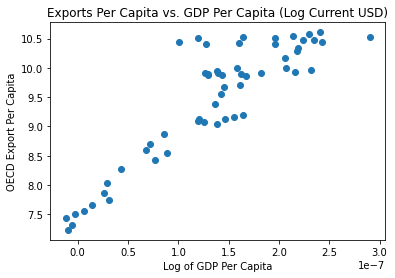

In [ ]:
plt.scatter(mean_data_oecd['Export_Density'], mean_data_oecd['lngdppc'])
plt.ylabel('OECD Export Per Capita')
plt.xlabel('Log of GDP Per Capita')
plt.title("Exports Per Capita vs. GDP Per Capita (Log Current USD)")

Text(0.5, 1.0, 'Imports Per Capita vs. GDP Per Capita (Log Current USD)')

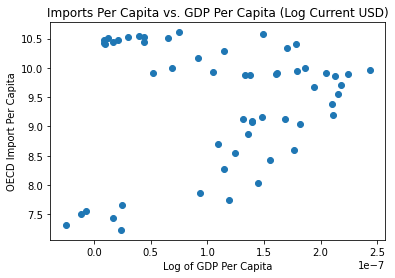

In [ ]:
plt.scatter(mean_data_oecd['Import_Density'], mean_data_oecd['lngdppc'])
plt.ylabel('OECD Import Per Capita')
plt.xlabel('Log of GDP Per Capita')
plt.title("Imports Per Capita vs. GDP Per Capita (Log Current USD)")

Visualizing GDP per capita over time 

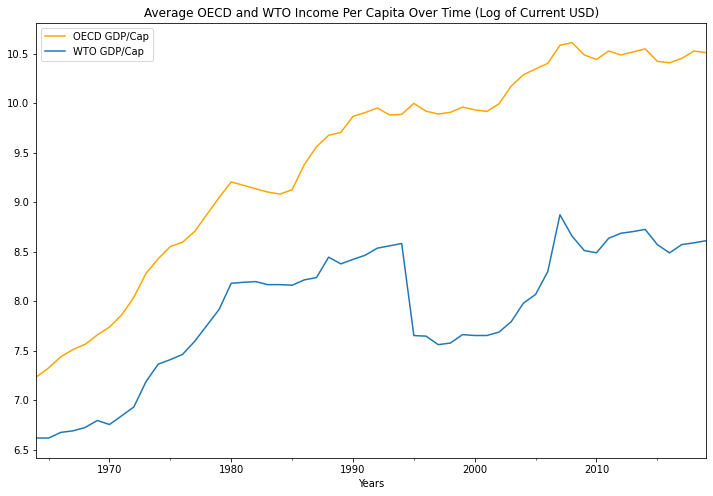

In [ ]:
# to set the plot size
plt.figure(figsize=(12,8))
  
mean_data_oecd['lngdppc'].plot(label='OECD GDP/Cap', color='orange')
mean_data_wto['lngdppc'].plot(label = 'WTO GDP/Cap')  
# adding title to the plot
plt.title('Average OECD and WTO Income Per Capita Over Time (Log of Current USD)')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

Create vectors (slices) of the data at certain time periods (1970 and 2019) and plot the maps over time.

In [ ]:
data_1970 = data_new[data_new['year'] == '1970']
data_2019 = data_new[data_new['year'] == '2019']

In [ ]:
country_1970 = data_1970.groupby(['countryname', 'Alpha-3 code']).mean().reset_index()
country_2019 = data_2019.groupby(['countryname', 'Alpha-3 code']).mean().reset_index()

Plotting the maps

In [ ]:
fig = px.choropleth(country_1970, locations = "Alpha-3 code",
                    color = 'lnEsgExportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Exports in 1970 (Log of Current USD)',title_x=0.5)
fig.show()

In [ ]:
fig = px.choropleth(country_2019, locations = "Alpha-3 code",
                    color = 'lnEsgExportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Exports in 2019 (Log of Current USD)',title_x=0.5)
fig.show()

Plotting imports now

In [ ]:
fig = px.choropleth(country_1970, locations = "Alpha-3 code",
                    color = 'lnEsgImportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Imports In 1970 (Log of Current USD)',title_x=0.5)
fig.show()

In [ ]:
fig = px.choropleth(country_2019, locations = "Alpha-3 code",
                    color = 'lnEsgImportsAdj',
                    hover_name = 'countryname',
                    color_continuous_scale='Viridis'
                    )
fig.update_layout(title='World Average ESG Imports In 2019 (Log of Current USD)',title_x=0.5)
fig.show()

In [ ]:
data_group = data.groupby(['countryname'])['lngdppc','totalesgimport', 'totalesgexport','lnEsgImportsAdj', 'lnEsgExportsAdj'].mean()
data_group['lngdppcsq'] = data_group['lngdppc'] * data_group['lngdppc']
data_group = data_group.reset_index()
data_group.sort_values(by=['lngdppcsq'],inplace=True)
data_group = data_group.dropna()
data_group
# data_2019_sum = data_group[data_group['year'] == '2019']
# data_2019_sum

<ipython-input-71-ae41f6d0fb29>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,countryname,lngdppc,totalesgimport,totalesgexport,lnEsgImportsAdj,lnEsgExportsAdj,lngdppcsq
193,Somalia,4.743551,1.216188e+06,2.715484e+03,-0.396518,-3.127155,22.501279
39,Chad,4.992647,4.356223e+05,4.189904e+03,-1.453414,-2.876945,24.926523
97,Haiti,5.060734,6.195603e+05,6.192395e+04,-0.699889,-1.820643,25.611026
31,Burundi,5.109438,1.765173e+06,3.850263e+04,-0.565640,-2.418898,26.106360
0,Afghanistan,5.290711,5.951899e+06,6.760044e+04,-0.555953,-2.341182,27.991623
...,...,...,...,...,...,...,...
201,Switzerland,10.501971,5.029288e+07,3.845794e+07,0.754585,1.221884,110.291386
218,United Arab Emirates,10.511517,7.566097e+07,2.751356e+07,1.881315,2.045850,110.491987
18,Belgium,10.560703,1.450698e+08,1.935340e+08,1.493528,2.821297,111.528445
22,Bermuda,10.622598,1.140455e+06,6.478597e+03,-2.575505,-2.799070,112.839578


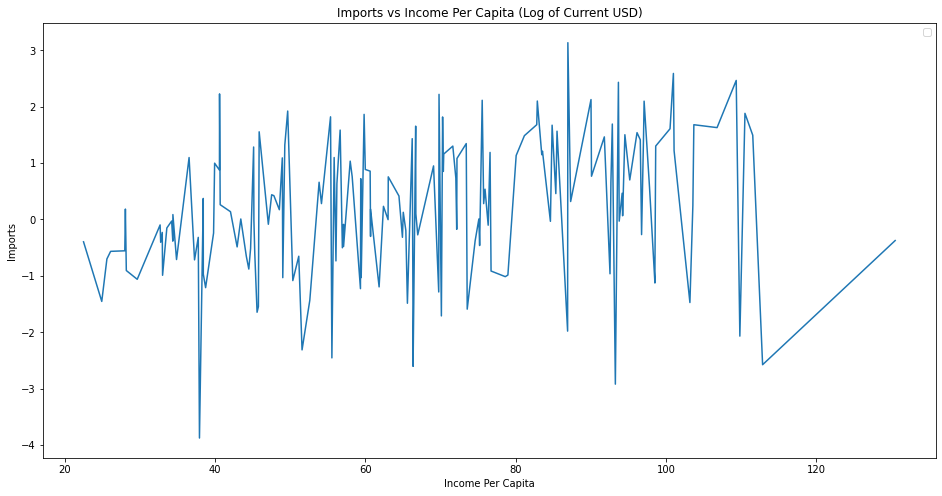

In [ ]:
 
fig, ax = plt.subplots(figsize = (16,8))
x = data_group['lngdppcsq']
y = data_group['lnEsgImportsAdj']
ax.plot(x, y)


# # log line of best fit
# xlog_data = np.log(x)            
# ylog_data = np.log(y)


# # a, b = np.polyfit(xlog_data, ylog_data, 1)

# plt.plot(x, ylog_data, color='red', linestyle='--', linewidth=2)
# adding title to the plot
plt.title('Imports vs Income Per Capita (Log of Current USD)')

  
# adding Label to the x-axis
plt.xlabel('Income Per Capita')
plt.ylabel('Imports')
  
# adding legend to the curve
plt.legend()